In [1]:
# libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
import seaborn as sns
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

sns.set_style('darkgrid')
pd. set_option
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\ENOCH\\Documents\\project file\\corona_tested12.csv", dtype={'column7': str}, low_memory=False)
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,30/04/2020,0,0,0,0,0,negative,None,female,Other
1,30/04/2020,1,0,0,0,0,negative,None,female,Other
2,30/04/2020,0,1,0,0,0,negative,None,male,Other
3,30/04/2020,1,0,0,0,0,negative,None,female,Other
4,30/04/2020,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,11/03/2020,0,0,0,0,0,negative,None,None,Other
278844,11/03/2020,0,0,0,0,0,negative,None,None,Other
278845,11/03/2020,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,11/03/2020,0,0,0,0,0,None,None,None,Other


In [3]:
df = df.replace('None', np.nan)

In [4]:
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,30/04/2020,0,0,0,0,0,negative,NaN,female,Other
1,30/04/2020,1,0,0,0,0,negative,NaN,female,Other
2,30/04/2020,0,1,0,0,0,negative,NaN,male,Other
3,30/04/2020,1,0,0,0,0,negative,NaN,female,Other
4,30/04/2020,1,0,0,0,0,negative,NaN,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,11/03/2020,0,0,0,0,0,negative,NaN,NaN,Other
278844,11/03/2020,0,0,0,0,0,negative,NaN,NaN,Other
278845,11/03/2020,0,0,0,0,0,positive,NaN,NaN,Contact with confirmed
278846,11/03/2020,0,0,0,0,0,NaN,NaN,NaN,Other


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278596 non-null  object
 2   fever                278596 non-null  object
 3   sore_throat          278847 non-null  object
 4   shortness_of_breath  278847 non-null  object
 5   head_ache            278847 non-null  object
 6   corona_result        274956 non-null  object
 7   age_60_and_above     151528 non-null  object
 8   gender               259285 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


In [6]:
df.describe()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,278848,278596,278596,278847,278847,278847,274956,151528,259285,278848
unique,51,2,2,2,2,2,2,2,2,3
top,20/04/2020,0,0,0,0,0,negative,No,female,Other
freq,10921,236368,256844,276921,277270,276433,260227,125703,130158,242741


In [7]:
# Assuming your DataFrame is named df
null_values_exist = df.isnull().any().any()

if null_values_exist:
    print("Null values still exist in the DataFrame.")
else:
    print("No null values in the DataFrame.")


Null values still exist in the DataFrame.


In [8]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,30/04/2020,0,0,0,0,0,negative,NaN,female,Other
1,30/04/2020,1,0,0,0,0,negative,NaN,female,Other
2,30/04/2020,0,1,0,0,0,negative,NaN,male,Other
3,30/04/2020,1,0,0,0,0,negative,NaN,female,Other
4,30/04/2020,1,0,0,0,0,negative,NaN,male,Other


In [9]:
missing_categorial = [var for var in df.columns if df[var].isnull().mean()>0 and df[var].dtype == 'O']

In [10]:
missing_categorial

['cough',
 'fever',
 'sore_throat',
 'shortness_of_breath',
 'head_ache',
 'corona_result',
 'age_60_and_above',
 'gender']

In [11]:
df['corona_result'].isnull().mean()

0.0139574248336011

In [12]:
df['corona_result'].isnull().sum()

3892

<Axes: >

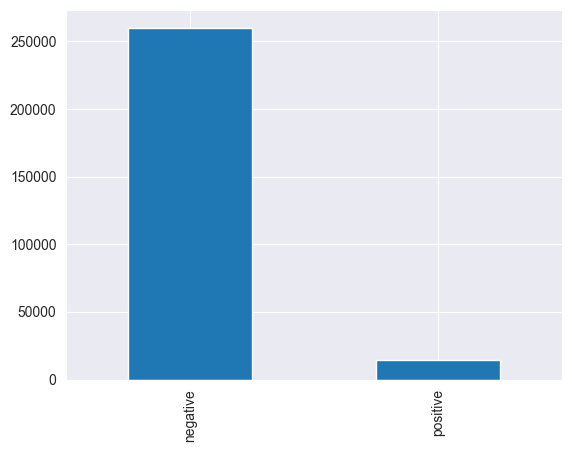

In [13]:
df['corona_result'].value_counts().plot.bar()

In [14]:
for i in df.columns:
    print (f"Unique value in {i}:")
    print(df[i].unique(), '\n')


Unique value in test_date:
['30/04/2020' '29/04/2020' '28/04/2020' '27/04/2020' '26/04/2020'
 '25/04/2020' '24/04/2020' '23/04/2020' '22/04/2020' '21/04/2020'
 '20/04/2020' '19/04/2020' '18/04/2020' '17/04/2020' '16/04/2020'
 '15/04/2020' '14/04/2020' '13/04/2020' '12/04/2020' '11/04/2020'
 '10/04/2020' '09/04/2020' '08/04/2020' '07/04/2020' '06/04/2020'
 '05/04/2020' '04/04/2020' '03/04/2020' '02/04/2020' '01/04/2020'
 '31/03/2020' '30/03/2020' '29/03/2020' '28/03/2020' '27/03/2020'
 '26/03/2020' '25/03/2020' '24/03/2020' '23/03/2020' '22/03/2020'
 '21/03/2020' '20/03/2020' '19/03/2020' '18/03/2020' '17/03/2020'
 '16/03/2020' '15/03/2020' '14/03/2020' '13/03/2020' '12/03/2020'
 '11/03/2020'] 

Unique value in cough:
['0' '1' nan] 

Unique value in fever:
['0' '1' nan] 

Unique value in sore_throat:
['0' '1' nan] 

Unique value in shortness_of_breath:
['0' '1' nan] 

Unique value in head_ache:
['0' '1' nan] 

Unique value in corona_result:
['negative' 'positive' nan] 

Unique value in 

In [15]:
df['corona_result'].value_counts()

negative    260227
positive     14729
Name: corona_result, dtype: int64

In [16]:
df['corona_result'].mode()

0    negative
Name: corona_result, dtype: object

In [17]:
df['corona_result'].fillna('negative', inplace = True)

In [18]:
df['corona_result'].isnull().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

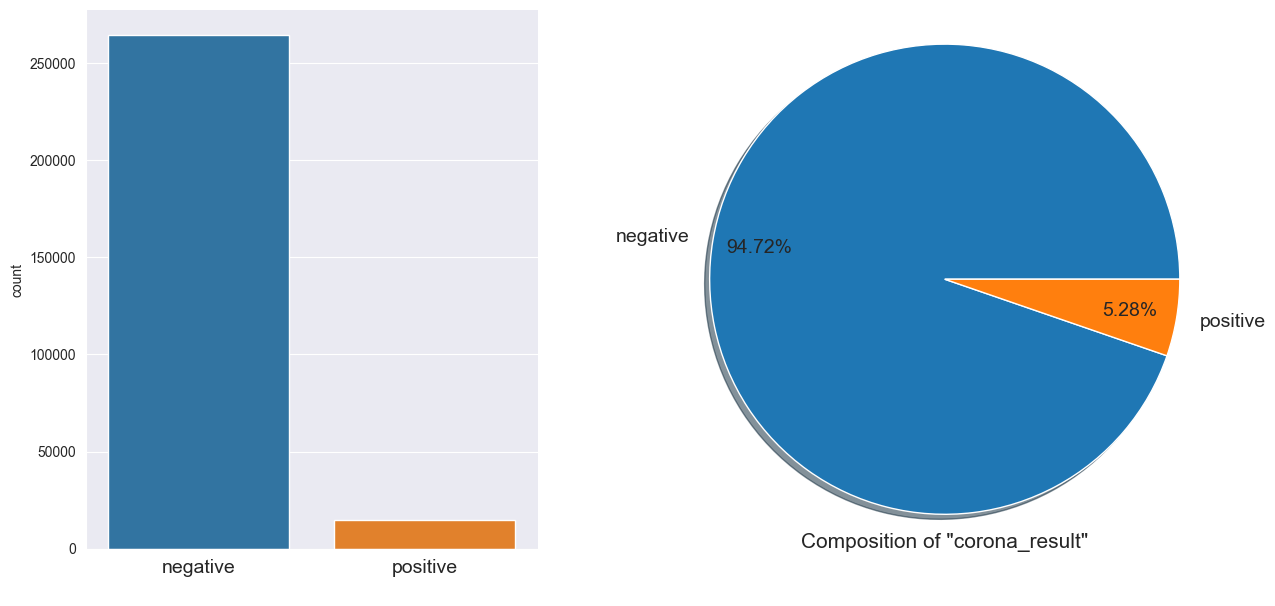

In [19]:
#checking the target
plt.figure(figsize=(14,7))
#barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["corona_result"])
ax1.set_xlabel(" ")
ax1.set_xlabel(" ")
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
sns.despine(top= True, right=True)
#pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["corona_result"].value_counts(),
       labels=list(df["corona_result"].unique()),
       autopct='%1.2f%%',
       pctdistance=0.8,
       shadow=True,
       radius=1.3,
       textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "corona_result"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show

<Axes: >

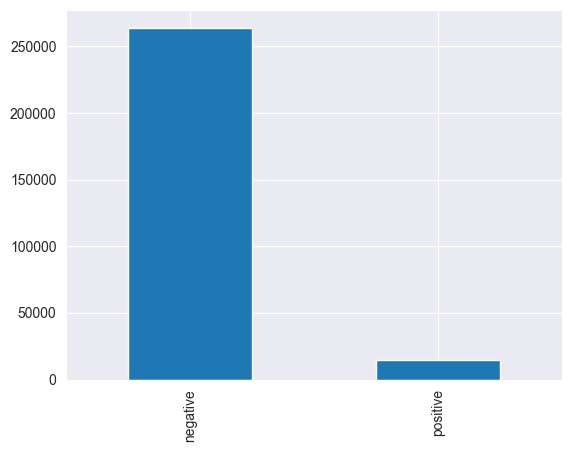

In [20]:
df['corona_result'].value_counts().plot.bar()

In [21]:
df['corona_result'].value_counts()

negative    264119
positive     14729
Name: corona_result, dtype: int64

In [22]:
df['age_60_and_above'].isnull().mean()

0.456592839109479

In [23]:
df['age_60_and_above'].isnull().sum()

127320

In [24]:
df['age_60_and_above'].value_counts()

No     125703
Yes     25825
Name: age_60_and_above, dtype: int64

<Axes: >

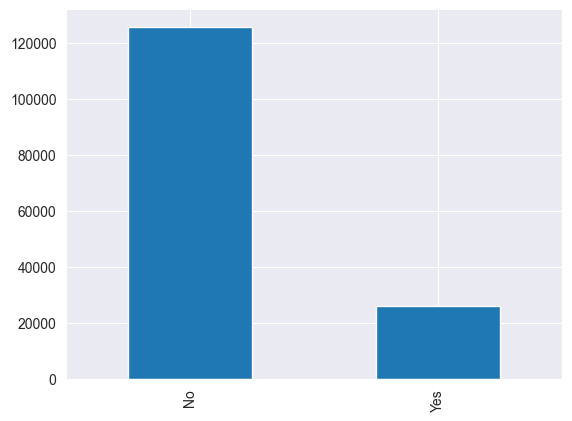

In [25]:
df['age_60_and_above'].value_counts().plot.bar()

In [26]:
df['age_60_and_above'].mode()

0    No
Name: age_60_and_above, dtype: object

In [27]:
df['age_60_and_above'].fillna('No', inplace = True)

In [28]:
df['age_60_and_above'].isnull().sum()

0

<Axes: >

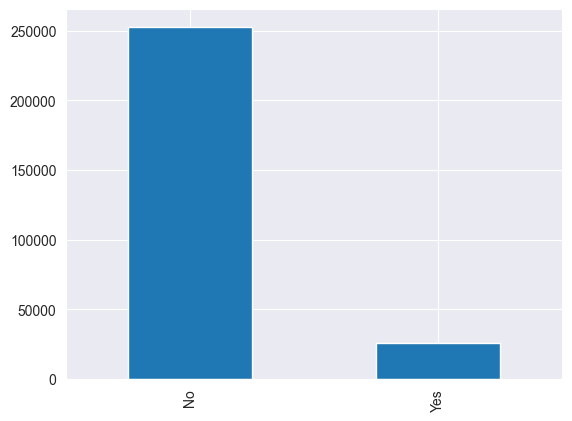

In [29]:
df['age_60_and_above'].value_counts().plot.bar()

In [30]:
df['gender'].isnull().mean()

0.07015650103282074

In [31]:
df['gender'].isnull().sum()

19563

In [32]:
df['gender'].value_counts()

female    130158
male      129127
Name: gender, dtype: int64

<Axes: >

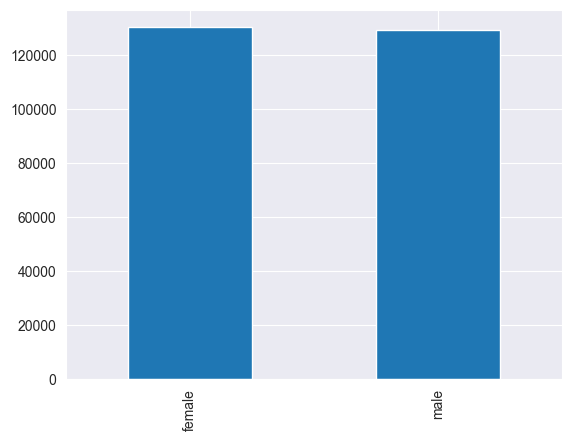

In [33]:
df['gender'].value_counts().plot.bar()

In [34]:
df['gender'].mode()

0    female
Name: gender, dtype: object

In [35]:
df['gender'].fillna('female', inplace = True)

In [36]:
df['gender'].isnull().sum()

0

<Axes: >

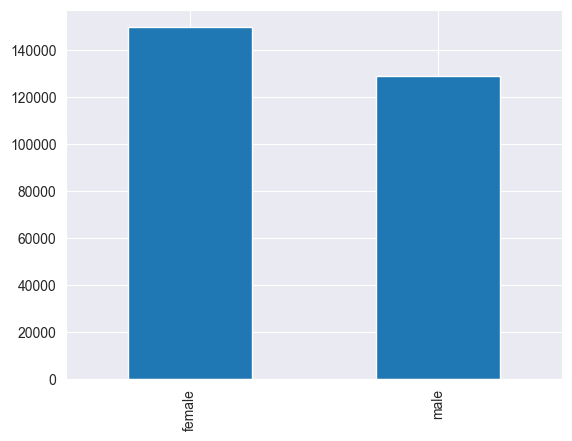

In [37]:
df['gender'].value_counts().plot.bar()

In [38]:
missing_values = df.isnull().sum()

In [39]:
missing_values

test_date                0
cough                  252
fever                  252
sore_throat              1
shortness_of_breath      1
head_ache                1
corona_result            0
age_60_and_above         0
gender                   0
test_indication          0
dtype: int64

In [40]:
df['cough'].isnull().mean()

0.0009037181546935966

In [41]:
df['cough'].isnull().sum()

252

In [42]:
df['cough'].value_counts()

0    236368
1     42228
Name: cough, dtype: int64

<Axes: >

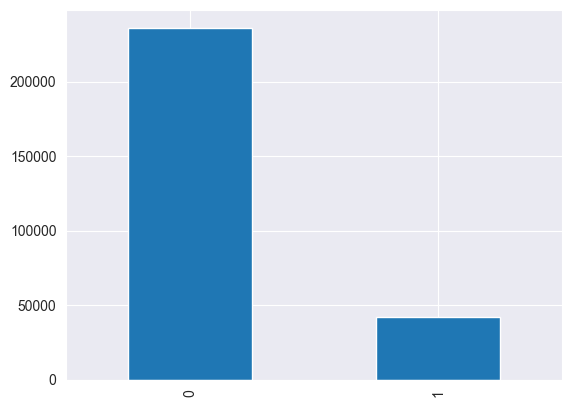

In [43]:
df['cough'].value_counts().plot.bar()

In [44]:
df['cough'].mode()

0    0
Name: cough, dtype: object

In [45]:
df['cough'].fillna('0.0', inplace = True)

In [46]:
df['cough'].isnull().sum()

0

<Axes: >

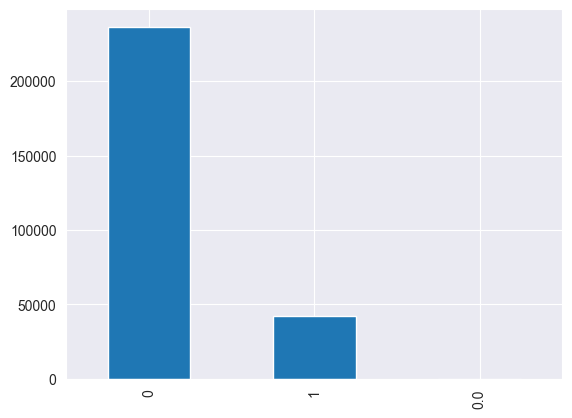

In [47]:
df['cough'].value_counts().plot.bar()

In [48]:
df['fever'].isnull().mean()

0.0009037181546935966

In [49]:
df['fever'].isnull().sum()

252

In [50]:
df['fever'].value_counts()

0    256844
1     21752
Name: fever, dtype: int64

<Axes: >

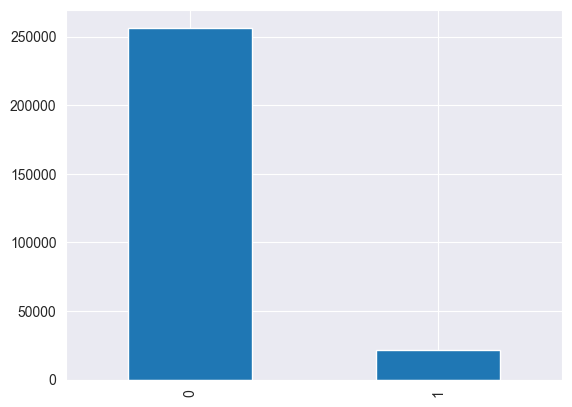

In [51]:
df['fever'].value_counts().plot.bar()

In [52]:
df['fever'].mode()

0    0
Name: fever, dtype: object

In [53]:
df['fever'].fillna('0.0', inplace = True)

In [54]:
df['fever'].isnull().sum()

0

<Axes: >

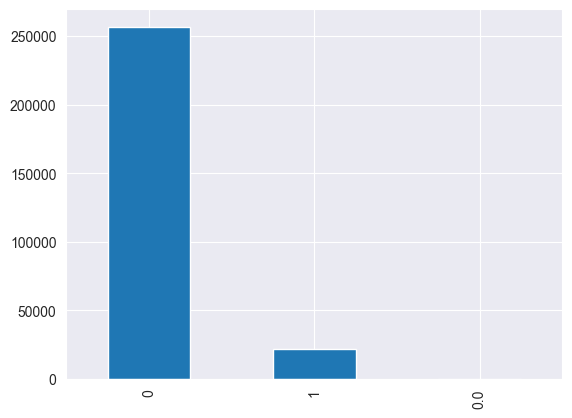

In [55]:
df['fever'].value_counts().plot.bar()

In [56]:
df['sore_throat'].isnull().mean()

3.586183153546018e-06

In [57]:
df['sore_throat'].isnull().sum()

1

In [58]:
df['sore_throat'].value_counts()

0    276921
1      1926
Name: sore_throat, dtype: int64

<Axes: >

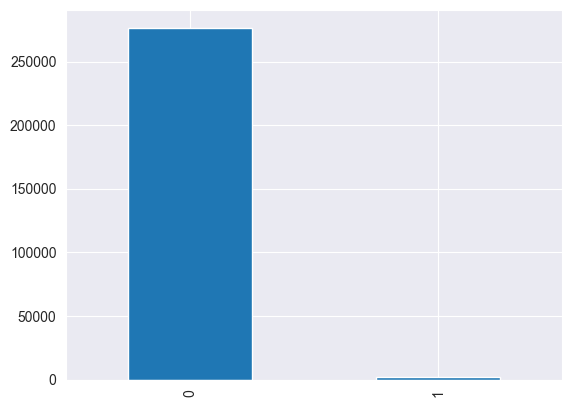

In [59]:
df['sore_throat'].value_counts().plot.bar()

In [60]:
df['sore_throat'].mode()

0    0
Name: sore_throat, dtype: object

In [61]:
df['sore_throat'].fillna('0.0', inplace = True)

In [62]:
df['sore_throat'].isnull().sum()

0

<Axes: >

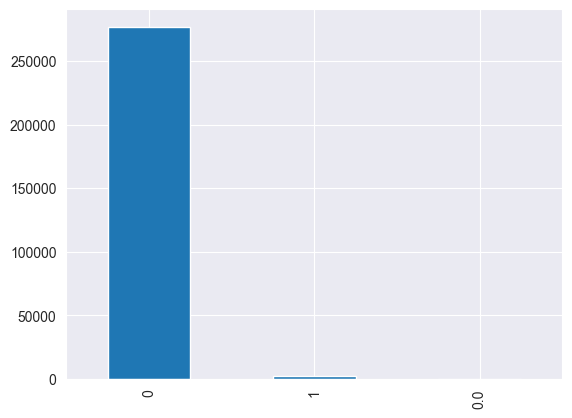

In [63]:
df['sore_throat'].value_counts().plot.bar()

In [64]:
df['shortness_of_breath'].isnull().mean()

3.586183153546018e-06

In [65]:
df['shortness_of_breath'].isnull().sum()

1

In [66]:
df['shortness_of_breath'].value_counts()

0    277270
1      1577
Name: shortness_of_breath, dtype: int64

<Axes: >

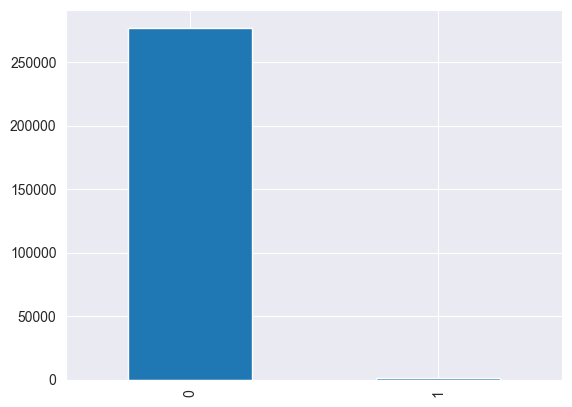

In [67]:
df['shortness_of_breath'].value_counts().plot.bar()

In [68]:
df['shortness_of_breath'].mode()

0    0
Name: shortness_of_breath, dtype: object

In [69]:
df['shortness_of_breath'].fillna('0.0', inplace = True)

In [70]:
df['shortness_of_breath'].isnull().sum()

0

<Axes: >

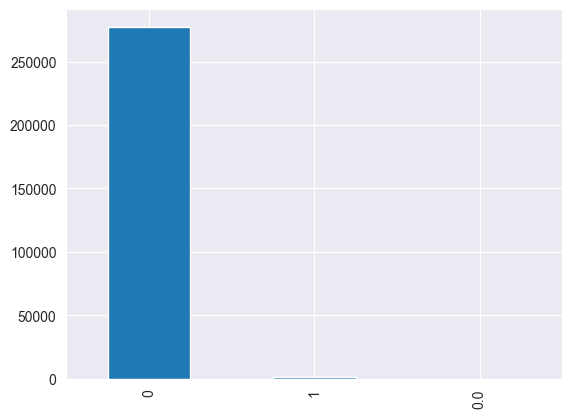

In [71]:
df['shortness_of_breath'].value_counts().plot.bar()

In [72]:
df['head_ache'].isnull().mean()

3.586183153546018e-06

In [73]:
df['head_ache'].isnull().sum()

1

In [74]:
df['head_ache'].value_counts()

0    276433
1      2414
Name: head_ache, dtype: int64

<Axes: >

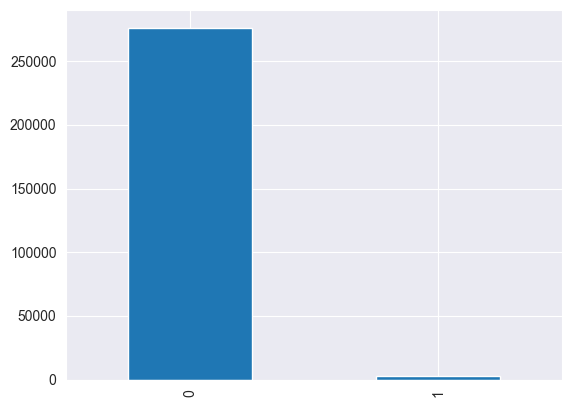

In [75]:
df['head_ache'].value_counts().plot.bar()

In [76]:
df['head_ache'].mode()

0    0
Name: head_ache, dtype: object

In [77]:
df['head_ache'].fillna('0.0', inplace = True)

In [78]:
df['head_ache'].isnull().sum()

0

<Axes: >

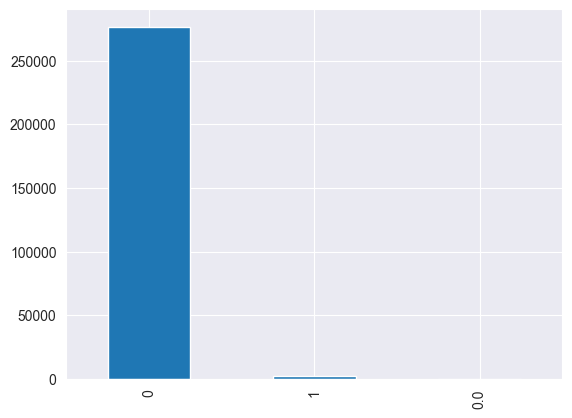

In [79]:
df['head_ache'].value_counts().plot.bar()

In [80]:
# Assuming your DataFrame is named df
null_values_exist = df.isnull().any().any()

if null_values_exist:
    print("Null values still exist in the DataFrame.")
else:
    print("No null values in the DataFrame.")


No null values in the DataFrame.


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


In [82]:
df_cat = df.select_dtypes(object)
df_cat

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,30/04/2020,0,0,0,0,0,negative,No,female,Other
1,30/04/2020,1,0,0,0,0,negative,No,female,Other
2,30/04/2020,0,1,0,0,0,negative,No,male,Other
3,30/04/2020,1,0,0,0,0,negative,No,female,Other
4,30/04/2020,1,0,0,0,0,negative,No,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,11/03/2020,0,0,0,0,0,negative,No,female,Other
278844,11/03/2020,0,0,0,0,0,negative,No,female,Other
278845,11/03/2020,0,0,0,0,0,positive,No,female,Contact with confirmed
278846,11/03/2020,0,0,0,0,0,negative,No,female,Other


In [83]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


In [84]:
le = LabelEncoder()

In [85]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 2: Handle mixed data types in categorical columns
for col in df_cat:
    if df_cat[col].dtype == object:
        # Convert the column to string data type
        df_cat[col] = df_cat[col].astype(str)
    else:
        # Convert the column to numeric data type, with non-numeric values converted to NaN
        df_cat[col] = pd.to_numeric(df_cat[col], errors='coerce')

# Step 3: Apply LabelEncoder to the categorical columns
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

# Print the transformed dataframe
df_cat.head()


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,49,0,0,0,0,0,0,0,0,2
1,49,2,0,0,0,0,0,0,0,2
2,49,0,2,0,0,0,0,0,1,2
3,49,2,0,0,0,0,0,0,0,2
4,49,2,0,0,0,0,0,0,1,2


In [86]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   test_date            278848 non-null  int32
 1   cough                278848 non-null  int32
 2   fever                278848 non-null  int32
 3   sore_throat          278848 non-null  int32
 4   shortness_of_breath  278848 non-null  int32
 5   head_ache            278848 non-null  int32
 6   corona_result        278848 non-null  int32
 7   age_60_and_above     278848 non-null  int32
 8   gender               278848 non-null  int32
 9   test_indication      278848 non-null  int32
dtypes: int32(10)
memory usage: 10.6 MB


In [87]:
#import pandas as pd
#from sklearn.preprocessing import LabelEncoder

# Export the transformed dataset to a new file
#df_cat.to_csv('transformed_corona_tested_dataset.csv', index=False)


In [88]:
df_cat.describe()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000
mean,25.916858,0.303778,0.156917,0.013818,0.011314,0.017318,0.052821,0.092613,0.463073,1.779181
std,15.399193,0.717198,0.536944,0.165652,0.149991,0.185289,0.223676,0.289890,0.498635,0.595588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,50.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000


In [89]:
x = df_cat[['test_date', 'cough','fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender','test_indication']]

In [90]:
y = df_cat[['corona_result']]

In [91]:
x.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
0,49,0,0,0,0,0,0,0,2
1,49,2,0,0,0,0,0,0,2
2,49,0,2,0,0,0,0,1,2
3,49,2,0,0,0,0,0,0,2
4,49,2,0,0,0,0,0,1,2


In [92]:
y

,corona_result
0,0
1,0
2,0
3,0
4,0
...,...
278843,0
278844,0
278845,1
278846,0


In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [94]:
x_test

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
143174,13,0,0,0,0,0,1,0,2
32689,39,0,0,0,0,0,0,0,2
30775,41,0,0,0,0,0,0,1,2
164077,6,2,2,0,0,0,1,0,0
45650,35,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...
13185,45,0,0,0,0,0,0,0,2
252831,38,0,0,0,0,0,0,0,2
119793,19,0,0,0,0,0,0,1,2
216922,50,2,0,0,0,0,0,1,0


In [95]:
y_test

,corona_result
143174,0
32689,0
30775,0
164077,0
45650,0
...,...
13185,0
252831,0
119793,0
216922,1


In [96]:
x_train

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
17569,45,0,0,0,0,0,0,0,2
65076,31,0,0,0,0,0,0,0,2
207195,0,0,2,0,0,0,0,0,2
39862,37,0,0,0,0,0,0,1,2
232554,44,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...
271565,24,0,0,0,0,0,1,0,2
276713,16,2,2,0,0,0,0,0,2
17169,45,0,0,0,0,0,0,0,2
234759,44,0,0,2,0,2,0,0,2


In [97]:
y_train

,corona_result
17569,0
65076,0
207195,1
39862,0
232554,0
...,...
271565,0
276713,0
17169,0
234759,1


In [98]:
##UPSAMPLING0.00035

x = df_cat.drop('corona_result', axis=1 )

y = df_cat['corona_result']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state =50)
print(x_train.shape, x_test.shape, y_train.shape ,y_test.shape)

(181251, 9) (97597, 9) (181251,) (97597,)


In [99]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter= Counter(y_train)
print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class={k}, n={v} ({per:.2f}%)")
    
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class={k}, n={v} ({per:.2f}%)")
    
print("=============================")

print("Upsampled data shape:", x_train.shape, y_train.shape)


Class=0, n=171577 (94.66%)
Class=1, n=9674 (5.34%)
Class=0, n=171577 (50.00%)
Class=1, n=171577 (50.00%)
Upsampled data shape: (343154, 9) (343154,)


In [100]:
#from imblearn import under_sampling, over_sampling 

In [101]:
#from imblearn.over_sampling import RandomOverSampler
#from collections import Counter
#ros= RandomOverSampler(random_state=50)
#x_train. y_train = ros.fit_resample(x, y)
#print(sorted(Counter(y_train).items()),y_train.shape)

In [102]:
x_train

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
0,42,0,2,0,0,0,1,1,1
1,11,0,0,0,0,0,0,0,0
2,37,0,0,0,0,0,0,0,2
3,27,0,0,0,0,0,0,1,2
4,23,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...
343149,0,0,0,0,0,0,1,0,1
343150,6,2,0,0,0,0,0,1,0
343151,40,2,0,0,0,0,0,0,1
343152,48,2,2,0,0,2,0,1,2


In [103]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
343149    1
343150    1
343151    1
343152    1
343153    1
Name: corona_result, Length: 343154, dtype: int32

In [104]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the model using the training data
clf.fit(x_train, y_train)


DecisionTreeClassifier()

# clf.get_params()

In [105]:
predictions = clf.predict (x_test)
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [106]:
clf.predict_proba(x_test)

array([[0.84875622, 0.15124378],
       [1.        , 0.        ],
       [0.96739901, 0.03260099],
       ...,
       [0.0982659 , 0.9017341 ],
       [0.80876769, 0.19123231],
       [0.80716846, 0.19283154]])

In [107]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9325901410904024

In [109]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions, labels=[0, 1])


array([[87211,  5331],
       [ 1248,  3807]], dtype=int64)

In [110]:
def evaluate_model_performance(y_test, predictions, DecisionTree):
    print(f"Confusion matrix for {DecisionTree}:")

In [111]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.41661195009848984

In [112]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.7531157270029674

In [113]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)


F1 Score: 0.5364616360177553


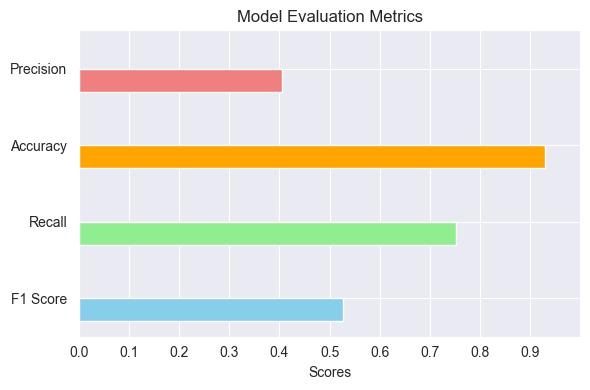

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Define the evaluation metrics
f1_score = 0.5264860493327942
recall = 0.7517321016166282
accuracy = 0.9300101607793916
precision = 0.40510267579340387


# Create a list of metric names and values
metrics = ['F1 Score', 'Recall', 'Accuracy', 'Precision']
values = [f1_score, recall, accuracy, precision]

# Define custom colors for the bars
colors = ['skyblue', 'lightgreen', 'orange', 'lightcoral']

# Adjust the width of the bars and the gap between them
bar_width = 0.3
bar_gap = 0.1

# Set the size of the chart
fig, ax = plt.subplots(figsize=(6, 4))  # Adjust the width and height as needed

# Plot the horizontal bar chart with custom colors and adjusted bars
y_pos = np.arange(len(metrics))
bar_positions = y_pos - bar_width / 2  # Adjust the positions of the bars
ax.barh(bar_positions, values, height=bar_width, align='center', color=colors)

# Set the y-axis tick positions and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(metrics)
ax.invert_yaxis()  # Invert y-axis to display metrics from top to bottom

# Add labels and title
ax.set_xlabel('Scores')
ax.set_title('Model Evaluation Metrics')

# Adjust the spacing between the bars
ax.set_xlim([0, 1])  # Set the x-axis limits
ax.set_ylim([-0.5, len(metrics) - 0.5])  # Set the y-axis limits
ax.set_xticks(np.arange(0, 1, 0.1))  # Adjust the x-axis tick positions

# Adjust the spacing between the bars and the y-axis ticks
ax.tick_params(axis='y', pad=bar_gap * 50)

# Display the bar chart
plt.tight_layout()  # Ensure the chart fits within the figure size
plt.show()


In [115]:

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Mean Square Error:", mse)


Mean Square Error: 0.06740985890959764


In [116]:
def rmse(y_test, predictions):
    return np.sqrt(np.mean((y_test - predictions)**2))
error= rmse(y_test, predictions)
print("root mean squared error:", error)

root mean squared error: 0.2596340865710772


In [117]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute error Error:", mae)

Mean Absolute error Error: 0.06740985890959764


In [118]:
#differences = predictions - y_test

#for i in range(len(y_test)):
 #   print("Actual value", y_test[i])
  #  print("Predicted value", predictions[i])
   # print("differences", differences[i])

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, zero_division=0, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.99      0.94      0.96     92542
    positive       0.42      0.75      0.54      5055

    accuracy                           0.93     97597
   macro avg       0.70      0.85      0.75     97597
weighted avg       0.96      0.93      0.94     97597



In [120]:
prediction_table = pd.DataFrame({'Predictions': y_pred})
prediction_table.to_csv('raw_data.csv', index=False)
print("Predictions in tabular form:")
print(prediction_table)


Predictions in tabular form:
       Predictions
0                0
1                0
2                0
3                0
4                0
...            ...
97592            0
97593            0
97594            1
97595            0
97596            0

[97597 rows x 1 columns]


In [121]:
feature_names = x.columns
feature_names

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'age_60_and_above', 'gender', 'test_indication'],
      dtype='object')

In [122]:
clf.feature_importances_

array([0.10657913, 0.04756418, 0.1679758 , 0.01835014, 0.01379013,
       0.02612155, 0.00833816, 0.01254304, 0.59873787])

In [123]:
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(by=0)
feature_importance

,0
age_60_and_above,0.008338
gender,0.012543
shortness_of_breath,0.013790
sore_throat,0.018350
head_ache,0.026122
cough,0.047564
test_date,0.106579
fever,0.167976
test_indication,0.598738


In [124]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['age_60_and_above',
 'gender',
 'shortness_of_breath',
 'sore_throat',
 'head_ache',
 'cough',
 'test_date',
 'fever',
 'test_indication']

<Axes: >

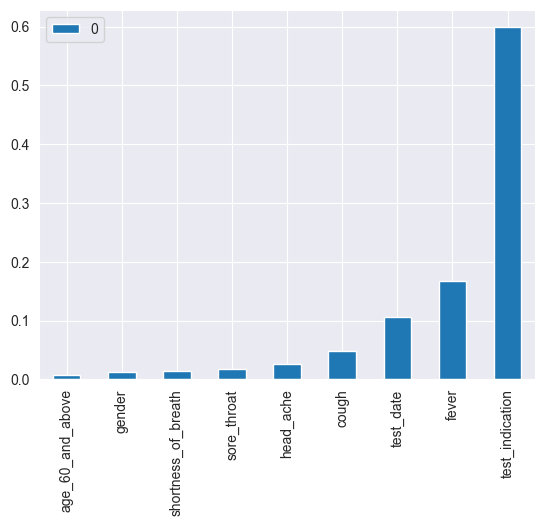

In [125]:
feature_importance.head(10).plot(kind = 'bar')

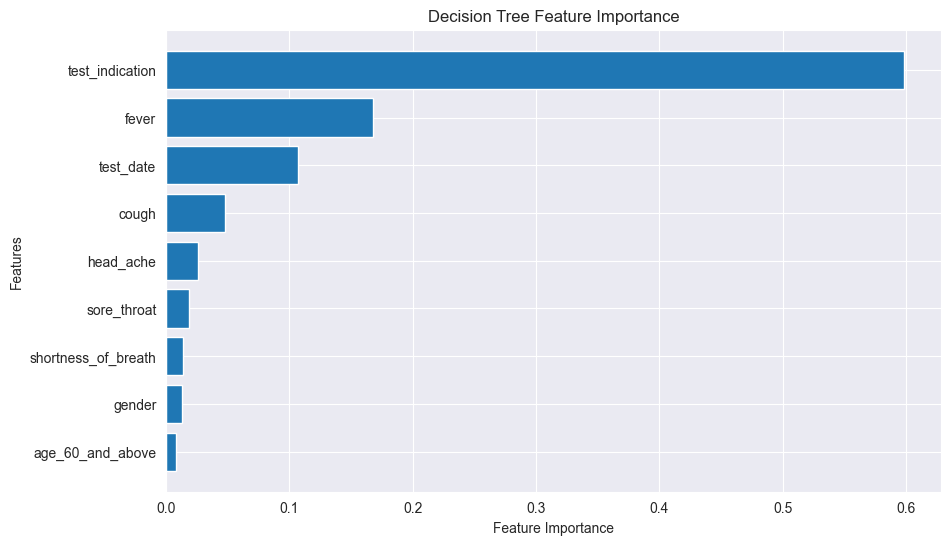

In [126]:
import matplotlib.pyplot as plt

feature_importance = clf.feature_importances_
sorted_indices = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), np.array(feature_names)[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

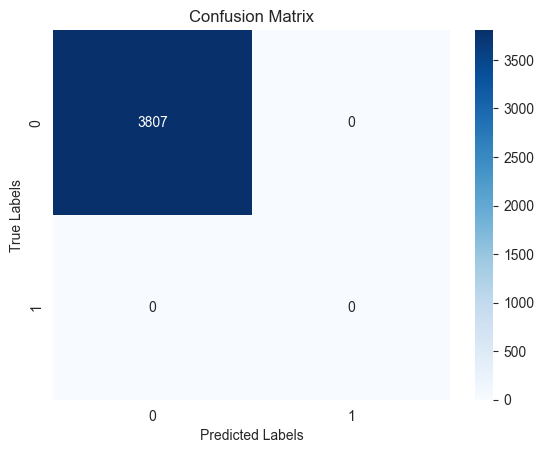

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(y_test, predictions, labels=[1, 2])
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

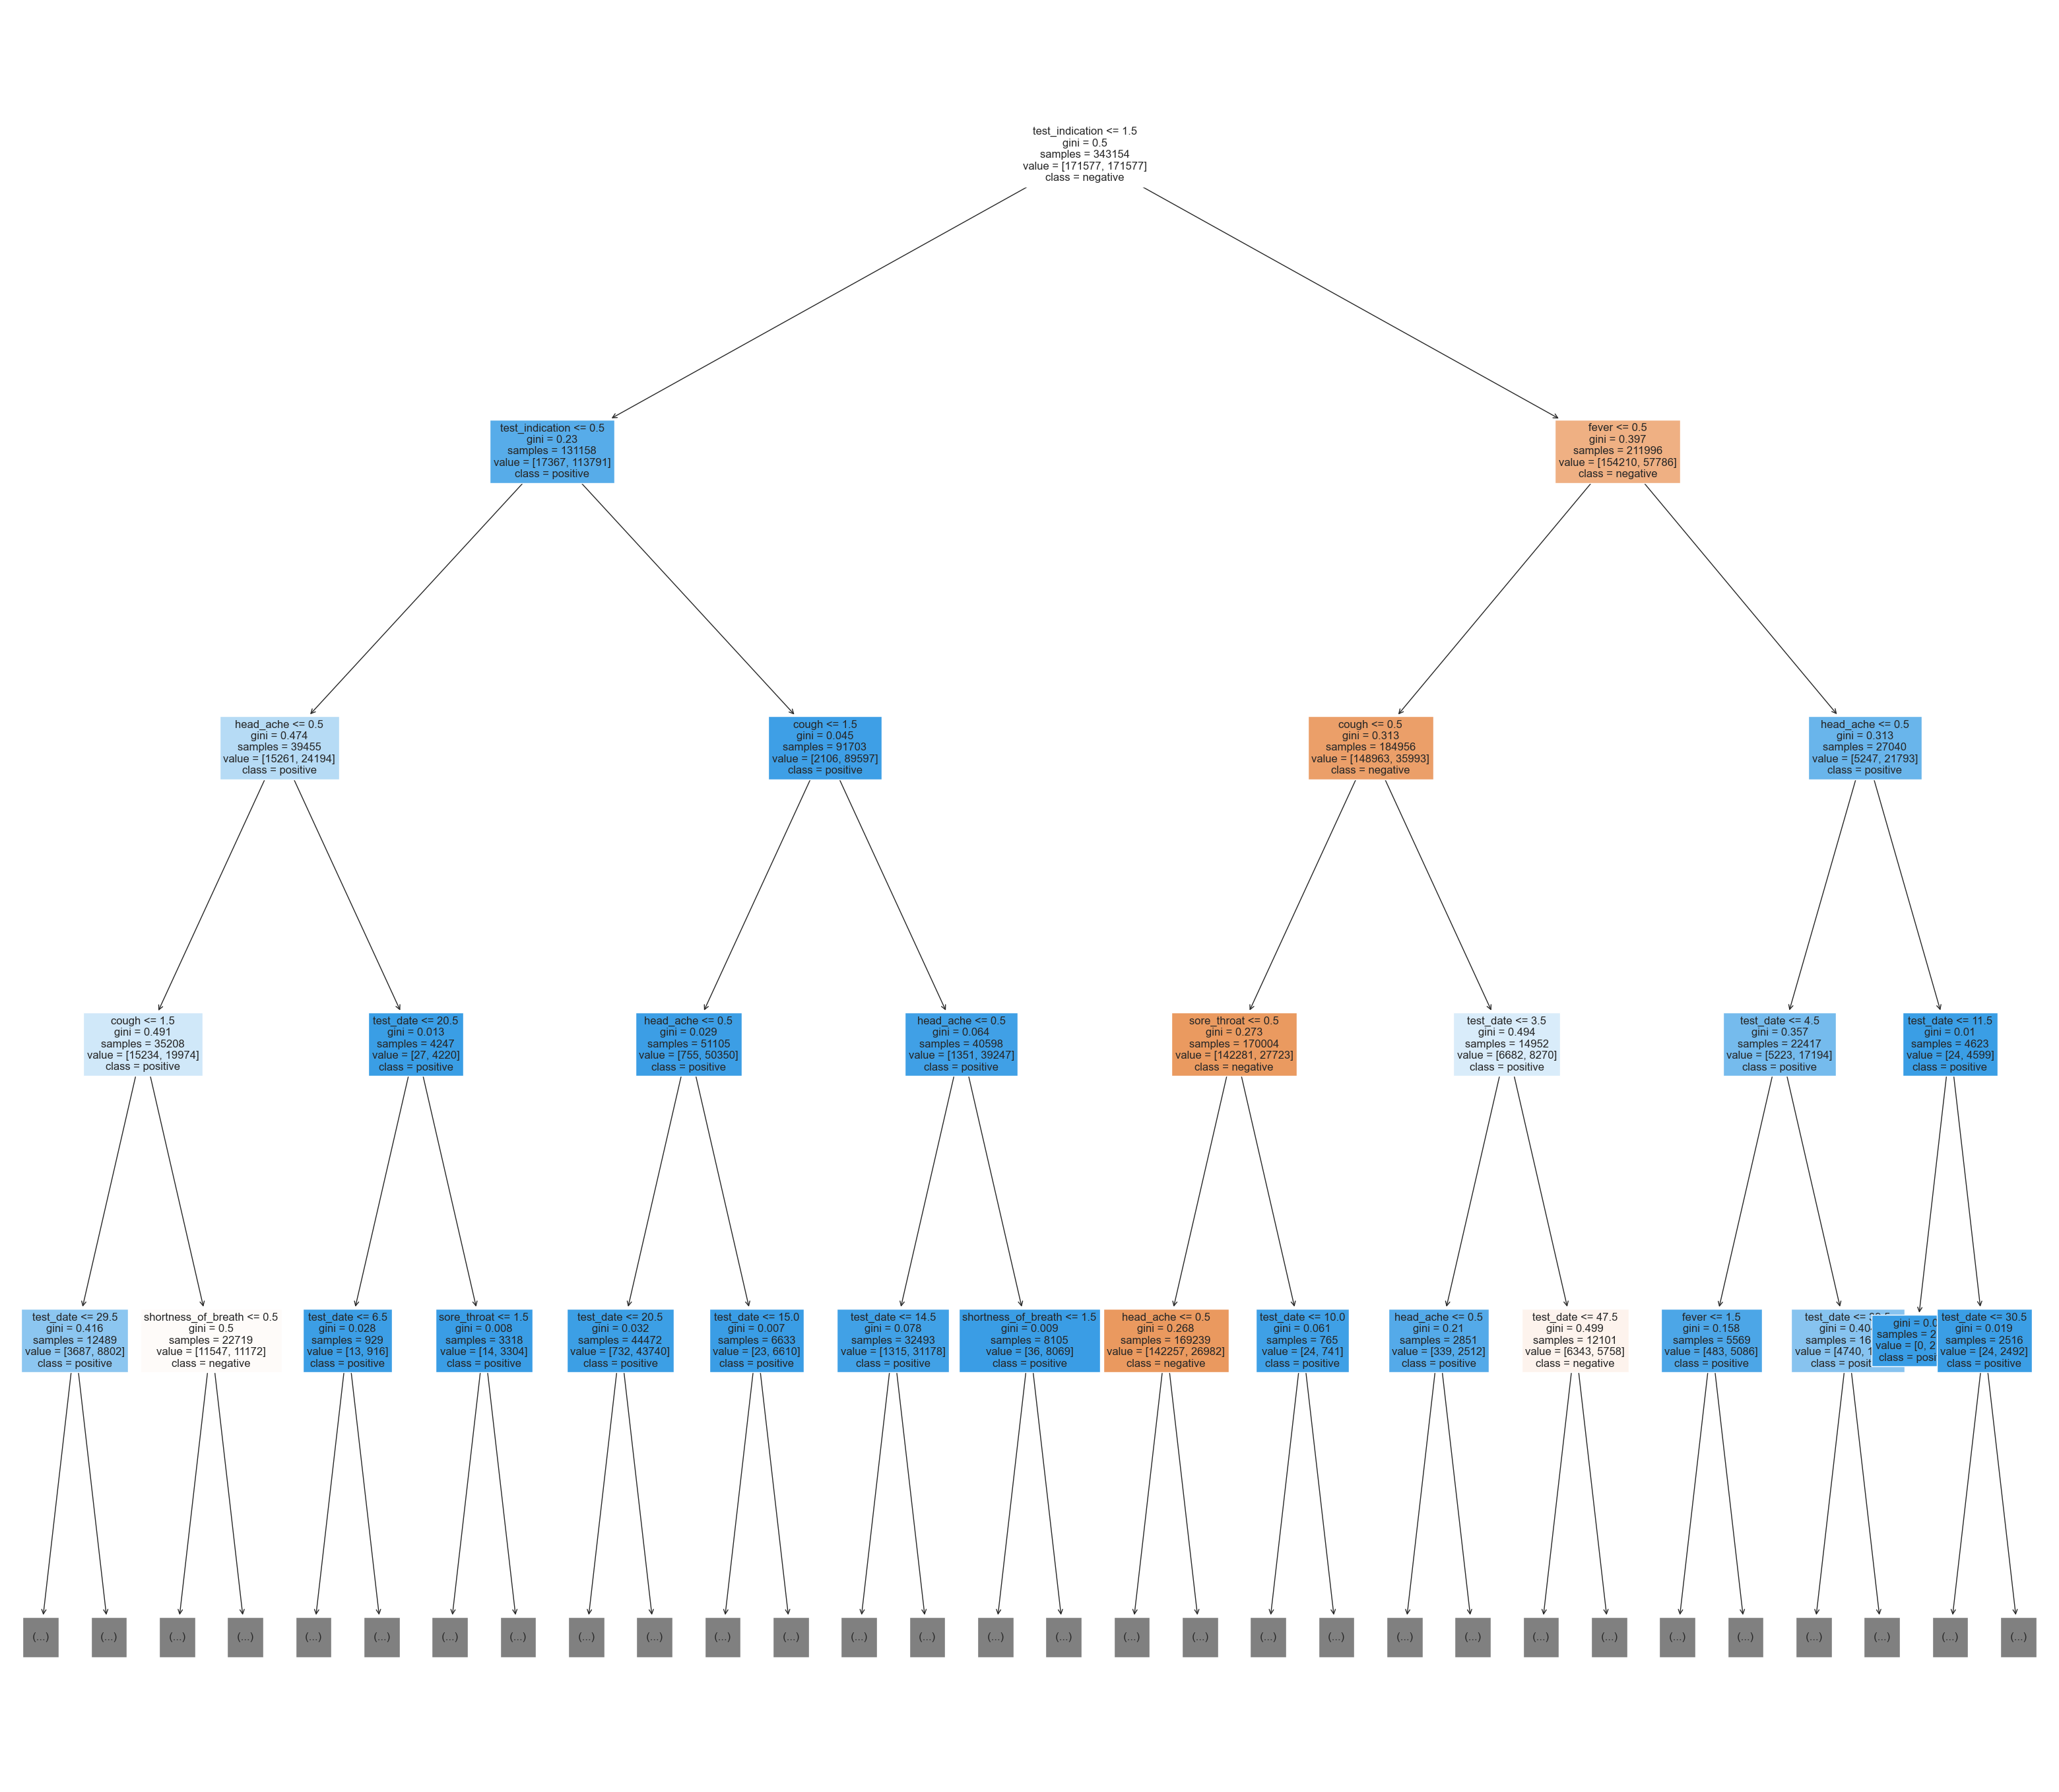

In [128]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(40, 35))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names={0: 'negative', 1: 'positive'},
                   filled=True,
                   max_depth=4,
                   fontsize=12)


In [129]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=42)

# Create an instance of RandomForestClassifier
rf = RandomForestClassifier()

# Train the model using the training data
rf.fit(x_train, y_train)


RandomForestClassifier()

In [130]:
prediction1 = rf.predict(x_test)
print(prediction1)


[0 0 0 ... 1 0 0]


In [131]:
rf.predict_proba(x_test)

array([[0.84874014, 0.15125986],
       [1.        , 0.        ],
       [0.9670725 , 0.0329275 ],
       ...,
       [0.1000345 , 0.8999655 ],
       [0.80895953, 0.19104047],
       [0.80796908, 0.19203092]])

In [132]:
accuracy_score(y_test, prediction1)

0.9328975275879382

In [133]:
precision_score(y_test, prediction1)

0.41899804814573843

In [134]:
recall_score(y_test, prediction1)

0.7643916913946588

In [135]:
print(classification_report(y_test, prediction1, zero_division=0, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.99      0.94      0.96     92542
    positive       0.42      0.76      0.54      5055

    accuracy                           0.93     97597
   macro avg       0.70      0.85      0.75     97597
weighted avg       0.96      0.93      0.94     97597



In [136]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, prediction1, labels=[0, 1])

array([[87184,  5358],
       [ 1191,  3864]], dtype=int64)

In [137]:
def evaluate_model_performance(y_test, prediction1, RandomForest):
    print(f"Confusion matrix for {RandomForest}:")

In [138]:
import xgboost as xgb
from xgboost import XGBClassifier

# Create an instance of XGBClassifier
xgb_model = XGBClassifier()

# Train the model using the training data
xgb_model.fit(x_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [139]:
# Make predictions on the test data
pred3 = xgb_model.predict(x_test)
print(pred3)


[0 0 0 ... 1 0 0]


In [140]:
xgb_model.predict_proba(x_test)

array([[0.8560109 , 0.14398912],
       [0.91113377, 0.08886623],
       [0.9679525 , 0.0320475 ],
       ...,
       [0.06235987, 0.93764013],
       [0.8190028 , 0.18099718],
       [0.80781215, 0.19218783]], dtype=float32)

In [141]:
accuracy_score(y_test, pred3)

0.9338709181634681

In [142]:
precision_score(y_test, pred3)

0.42454967101715024

In [143]:
recall_score(y_test, pred3)

0.7786350148367952

In [144]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Mean Square Error:", mse)

Mean Square Error: 0.06740985890959764


In [145]:
print(classification_report(y_test, pred3, zero_division=0, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.99      0.94      0.96     92542
    positive       0.42      0.78      0.55      5055

    accuracy                           0.93     97597
   macro avg       0.71      0.86      0.76     97597
weighted avg       0.96      0.93      0.94     97597



In [146]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred3, labels=[0, 1])

array([[87207,  5335],
       [ 1119,  3936]], dtype=int64)

In [147]:
def evaluate_model_performance(y_test, pred3, XGB):
    print(f"Confusion matrix for {XGB}:")
    

In [148]:
evaluate_model_performance(y_test, predictions, "Decision tree")
evaluate_model_performance(y_test, prediction1, "random forest")
evaluate_model_performance(y_test, pred3, "xgboost")

Confusion matrix for Decision tree:
Confusion matrix for random forest:
Confusion matrix for xgboost:


In [149]:
pred3
print pd.Dataframe("pred3"{pred3})


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (3381300842.py, line 2)

In [ ]:
print(xgb_model.get_params())


In [ ]:
import graphviz
import matplotlib.pyplot as plt
xgb.plot_tree(xgb_model, num_trees=0)
plt.show()